In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read and explore data
df = pd.read_csv('../data/incarceration_trends.csv')

with pd.option_context('display.max_columns', None):
    display(df.head(5))

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,asian_pop_15to64,black_pop_15to64,latino_pop_15to64,native_pop_15to64,other_pop_15to64,white_pop_15to64,urbanicity,region,division,commuting_zone,metro_area,land_area,total_jail_adm,total_jail_adm_dcrp,female_jail_adm_dcrp,male_jail_adm_dcrp,total_jail_pop,female_jail_pop,male_jail_pop,asian_jail_pop,black_jail_pop,latino_jail_pop,native_jail_pop,white_jail_pop,total_jail_pretrial,female_jail_pretrial,male_jail_pretrial,jail_from_state_prison,jail_from_other_state_prison,jail_from_state_jail,jail_from_other_state_jail,jail_from_fed,jail_from_ice,total_jail_pop_dcrp,female_jail_pop_dcrp,male_jail_pop_dcrp,total_prison_pop,female_prison_pop,male_prison_pop,asian_prison_pop,black_prison_pop,latino_prison_pop,native_prison_pop,other_prison_pop,white_prison_pop,total_prison_adm,female_prison_adm,male_prison_adm,asian_prison_adm,black_prison_adm,latino_prison_adm,native_prison_adm,other_prison_adm,white_prison_adm,num_facilites,num_employees,confined_pop,capacity,ucr_population,index_crime,violent_crime,property_crime,murder_crime,rape_crime,robbery_crime,agr_assault_crime,burglary_crime,larceny_crime,mv_theft_crime,arson_crime
0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,NaN,3413,NaN,NaN,15.0,10726,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,NaN,3451,NaN,NaN,24.0,11290,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,NaN,3625,NaN,NaN,31.0,12283,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,NaN,3747,NaN,NaN,41.0,13118,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,NaN,3791,NaN,NaN,49.0,13738,small/mid,South,East South Central,60.0,33860.0,594.449,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['full_fips'] = df['fips'].astype(str).str.rjust(5,'0')

In [44]:
df['state'] = df['fips'].astype(str)

In [36]:
df['fips_int']=df['fips'].apply(lambda x: '{0:0>5}'.format(x))

In [45]:
df[['fips','state']]

,fips,state
0,1001,1001
1,1001,1001
2,1001,1001
3,1001,1001
4,1001,1001
5,1001,1001
6,1001,1001
7,1001,1001
8,1001,1001
9,1001,1001


In [4]:
race_df = df[['year','state','county_name','total_pop_15to64', 'white_pop_15to64', 'black_pop_15to64', 'total_jail_pop', 'white_jail_pop','black_jail_pop', 'total_prison_pop', 'white_prison_pop','black_prison_pop']]

In [5]:
# Only the years after 1989 have the data that I am utilizing so I am creating 
# a subset of the dataset. Additionally, some of the data is incomplete for 2016
# so that is being excluded. 
subset_race_df = race_df[race_df.year>1989][race_df.year<=2015]

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [6]:
subset_race_df['perc_white_total_pop'] = subset_race_df['white_pop_15to64'] / subset_race_df['total_pop_15to64']
subset_race_df['perc_black_total_pop'] = subset_race_df['black_pop_15to64'] / subset_race_df['total_pop_15to64']

In [7]:
subset_race_df['perc_white_jail_pop'] = subset_race_df['white_jail_pop'] / subset_race_df['total_jail_pop']
subset_race_df['perc_black_jail_pop'] = subset_race_df['black_jail_pop'] / subset_race_df['total_jail_pop']

In [8]:
subset_race_df['perc_white_prison_pop'] = subset_race_df['white_prison_pop'] / subset_race_df['total_prison_pop']
subset_race_df['perc_black_prison_pop'] = subset_race_df['black_prison_pop'] / subset_race_df['total_prison_pop']

In [14]:
county_df=subset_race_df[subset_race_df.county_name=='Alameda County']

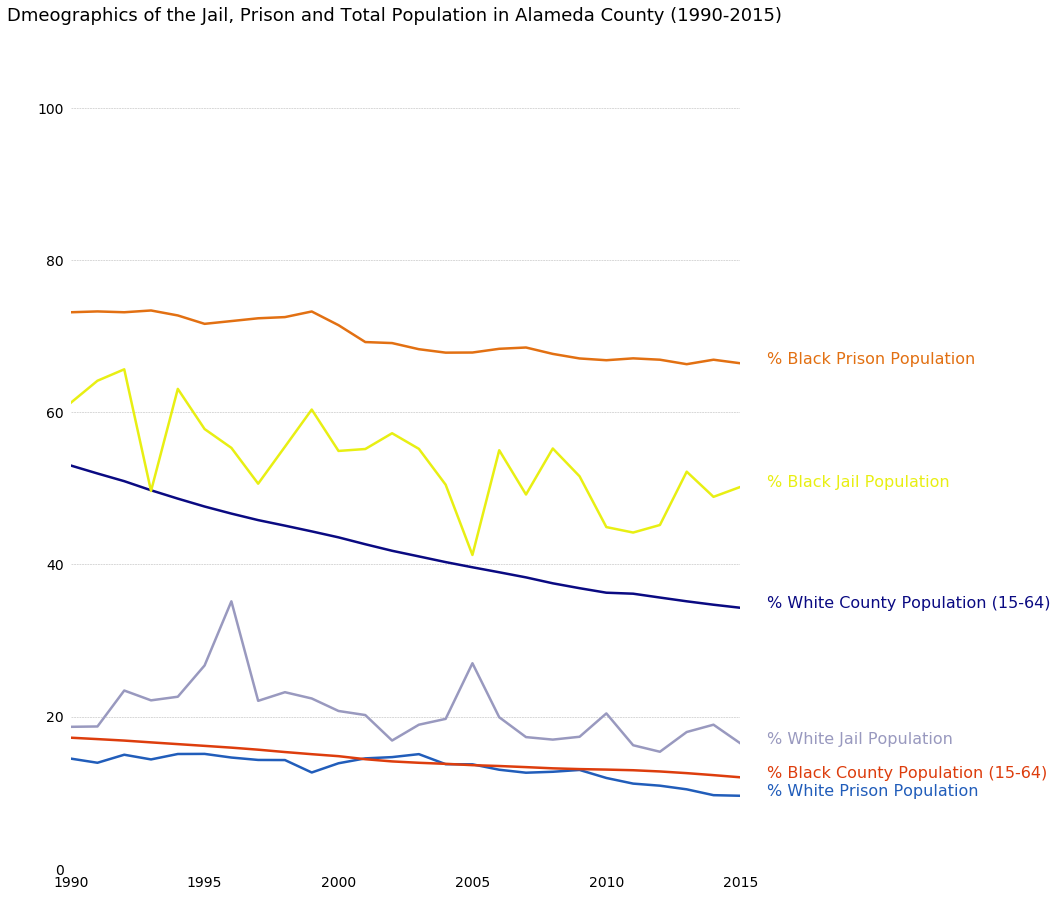

In [34]:
data = [[county_df.perc_white_total_pop, "% White County Population (15-64)"],
              [county_df.perc_white_jail_pop, "% White Jail Population"],
              [county_df.perc_white_prison_pop, "% White Prison Population"],
              [county_df.perc_black_total_pop, "% Black County Population (15-64)"],
              [county_df.perc_black_jail_pop, "% Black Jail Population"],
              [county_df.perc_black_prison_pop, "% Black Prison Population"]]

# These are the colors that will be used in the plot
color_sequence = ['#0a0a82','#9999bf','#215dba', '#dd3d0d','#e8ef13', '#e27012',]
                  
fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# Remove the plot frame lines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure axis ticks are only on the bottom and left
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
           ['0', '20', '40', '60', '80', '100'], fontsize=14)
plt.ylim(0,1)
plt.xlim(1990,2015)

# Add light color tick lines in background of plot
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Remove tick marks
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

for i, datagroup in enumerate(data):
    
    line = plt.plot(county_df.year,
                    datagroup[0],
                    lw=2.5,
                    color=color_sequence[i])
    
    y_pos = datagroup[0].iloc[-1]
    
    plt.text(2016, y_pos, datagroup[1], fontsize=16, color=color_sequence[i])
    
#plt.legend(fontsize=15,ncol=2)

fig.suptitle('Dmeographics of the Jail, Prison and Total '
             'Population in Alameda County (1990-2015)', 
             fontsize=18, ha='center')

plt.show()